In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)

In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537302
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [4]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


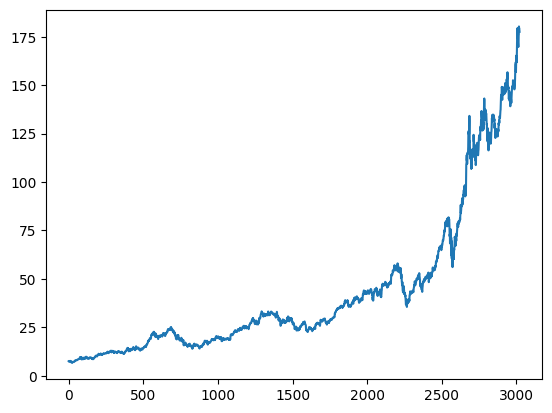

In [5]:
plt.plot(df.Close)

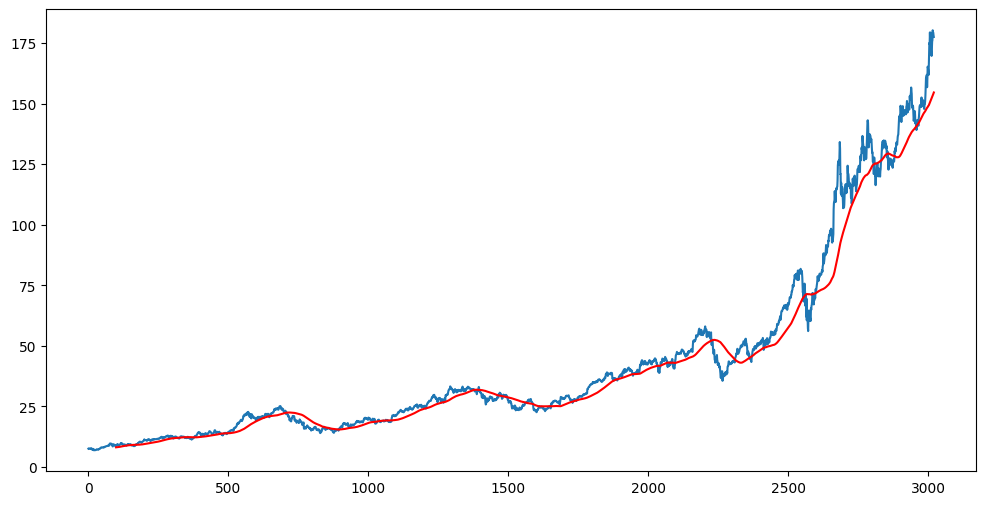

In [6]:
ma100 = df.Close.rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

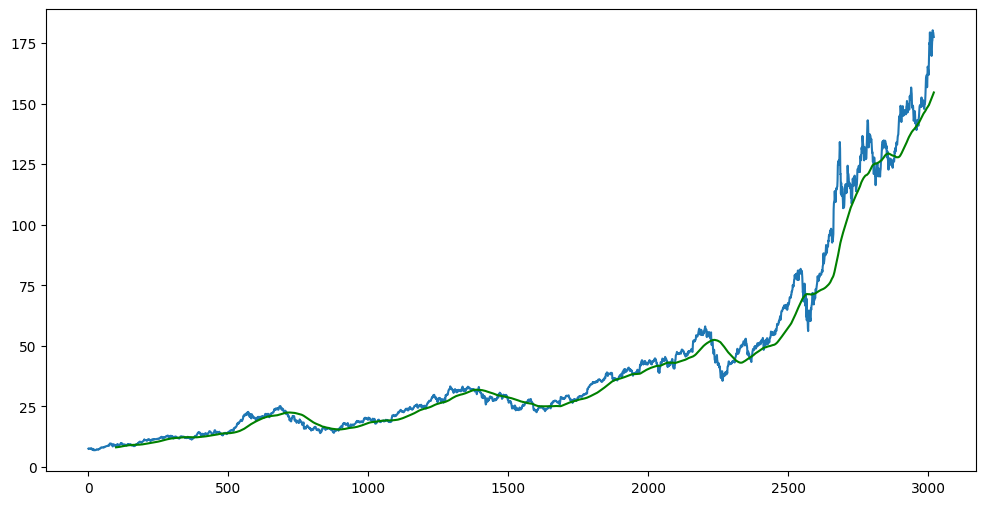

In [7]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'g')

In [8]:
df.shape

(3022, 5)

In [9]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [11]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [13]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 19s 215ms/step - loss: 0.0437
Epoch 2/50
63/63 [==============================] - 13s 201ms/step - loss: 0.0104
Epoch 3/50
63/63 [==============================] - 12s 194ms/step - loss: 0.0080
Epoch 4/50
63/63 [==============================] - 12s 193ms/step - loss: 0.0072
Epoch 5/50
63/63 [==============================] - 12s 191ms/step - loss: 0.0078
Epoch 6/50
63/63 [==============================] - 12s 198ms/step - loss: 0.0068
Epoch 7/50
63/63 [==============================] - 12s 196ms/step - loss: 0.0061
Epoch 8/50
63/63 [==============================] - 12s 197ms/step - loss: 0.0061
Epoch 9/50
63/63 [==============================] - 12s 197ms/step - loss: 0.0056
Epoch 10/50
63/63 [==============================] - 12s 196ms/step - loss: 0.0058
Epoch 11/50
63/63 [==============================] - 14s 217ms/step - loss: 0.0050
Epoch 12/50
63/63 [==============================] - 13s 211ms/step - loss: 0.0047
Epoch 13/50
6

In [19]:
model.save('keras_model.h5')

In [20]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [21]:
past_100_days = data_training.tail(100)

In [22]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\91628\AppData\Local\Temp\ipykernel_12968\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [23]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [24]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [26]:
input_data.shape

(1007, 1)

In [28]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [29]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [30]:
# Making Predictions

y_predicted = model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 3s 63ms/step


(907, 1)

In [31]:
scaler.scale_

array([0.00690691])

In [32]:
scale_factor = 1/0.00690691
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

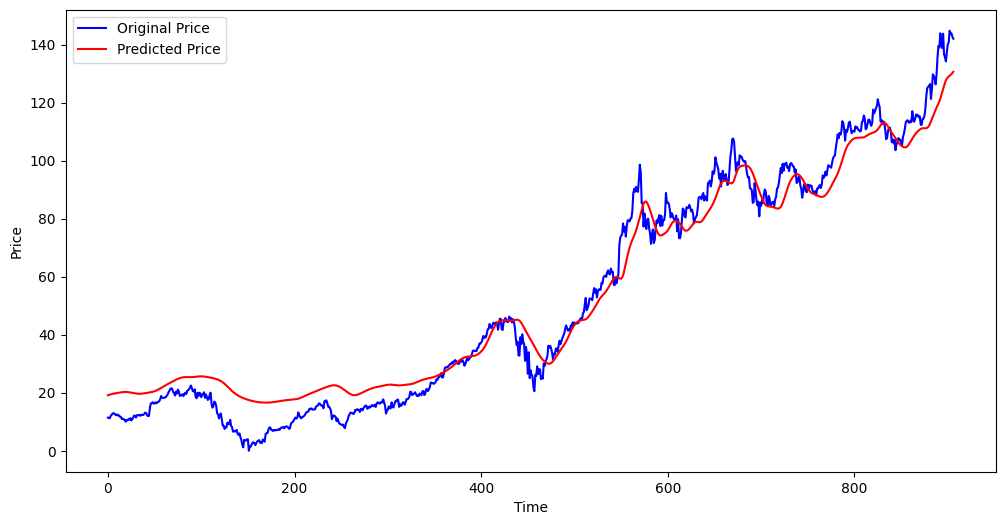

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()